# (07) vH — save 16x16

**Motivation**: $16 \times 16$, low contrast removed (bottom 5%). <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
from figures.fighelper import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from figures.imgs import plot_weights
from utils.imgproc import (
    do_process, xtract_patches,
    do_fft, compute_fftfreq,
    EyeDataset,
)

## DOVES $(24 \rightarrow 16)$

In [3]:
npix = 24
doves = EyeDataset()
patches = xtract_patches(doves.imgs, npix)
x_wt, x_wt_cn, x_wt_cn_zs = do_process(patches)
x = patches[..., 4:-4, 4:-4]

doves.imgs.shape, patches.shape, x_wt_cn_zs.shape

(torch.Size([101, 1, 768, 1024]),
 torch.Size([101, 1344, 1, 24, 24]),
 torch.Size([101, 1344, 1, 16, 16]))

### Identify low contrast patches

Bottom 5%

In [4]:
q = 0.05

vars = np.var(tonp(x), axis=(-1, -2))
vars = np.log(vars.ravel())
thres = np.quantile(vars, q)
accept = vars > thres

msg = f"# removed: {(~accept).sum()} ——— # final: {accept.sum()}"
print(msg)

# removed: 6788 ——— # final: 128956

### Remove low contrast patches

In [5]:
x, x_wt, x_wt_cn, x_wt_cn_zs = map(
    lambda a: flatten_np(a, end_dim=1)[accept],
    [x, x_wt, x_wt_cn, x_wt_cn_zs],
)
x_wt_cn_zs.shape

torch.Size([128956, 1, 16, 16])

In [6]:
ncols = 32
rng = get_rng()
ids = rng.choice(range(len(x)), size=ncols, replace=False)

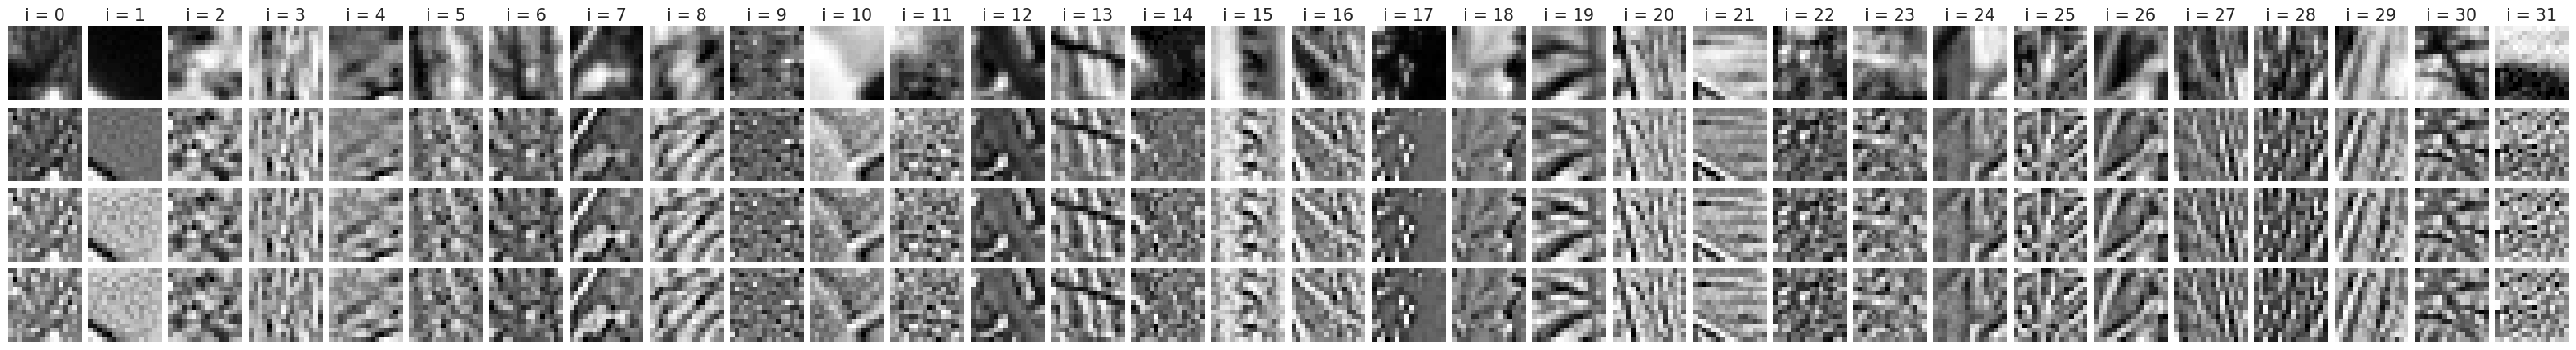

In [7]:
fig, axes = create_figure(4, ncols, (1.0 * ncols, 4.25), 'all', 'all')
for i in range(ncols):
    axes[0, i].imshow(tonp(x[ids[i], 0].squeeze()), cmap='Greys_r')
    axes[1, i].imshow(tonp(x_wt[ids[i], 0].squeeze()), cmap='Greys_r')
    axes[2, i].imshow(tonp(x_wt_cn[ids[i], 0].squeeze()), cmap='Greys_r')
    axes[3, i].imshow(tonp(x_wt_cn_zs[ids[i], 0].squeeze()), cmap='Greys_r')
    axes[0, i].set_title(f"i = {i}", fontsize=15)
remove_ticks(axes)
plt.show()

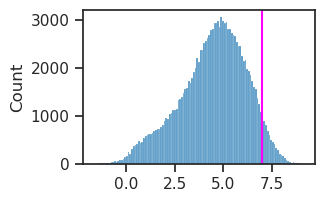

In [8]:
bad_i = 31

sns.histplot(vars)
plt.axvline(vars[ids[bad_i]], color='magenta');

## Save data

### Shuffle

In [9]:
shuffle_inds = np.arange(len(x))
rng = get_rng()
rng.shuffle(shuffle_inds)

### Create save dir

In [10]:
save_dir = pjoin(doves.path, 'vH16')
os.makedirs(save_dir, exist_ok=True)
os.listdir(save_dir)

[]

### Save

In [11]:
save = {
    'patches': tonp(x)[shuffle_inds],
    'wt': tonp(x_wt)[shuffle_inds],
    'wt_cn': tonp(x_wt_cn)[shuffle_inds],
    'processed': tonp(x_wt_cn_zs)[shuffle_inds],
}
for name, obj in save.items():
    save_obj(
        obj=obj,
        file_name=name,
        save_dir=save_dir,
        verbose=True,
        mode='npy',
    )

[PROGRESS] 'patches.npy' saved at
/home/hadi/Datasets/DOVES/vH16

[PROGRESS] 'wt.npy' saved at
/home/hadi/Datasets/DOVES/vH16

[PROGRESS] 'wt_cn.npy' saved at
/home/hadi/Datasets/DOVES/vH16

[PROGRESS] 'processed.npy' saved at
/home/hadi/Datasets/DOVES/vH16